In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [2]:
#import NYSE data
NYSE = pd.read_csv('../data/NYSE_1985to2023.csv')
NYSE.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-02,1009.049988,1009.049988,1009.049988,1009.049988,1009.049988,0
1,1985-01-03,1005.030029,1005.030029,1005.030029,1005.030029,1005.030029,0
2,1985-01-04,1000.270020,1000.270020,1000.270020,1000.270020,1000.270020,0
3,1985-01-07,1003.340027,1003.340027,1003.340027,1003.340027,1003.340027,0
4,1985-01-08,1002.500000,1002.500000,1002.500000,1002.500000,1002.500000,0


In [3]:
#check for null values
NYSE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9803 entries, 0 to 9802
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9803 non-null   object 
 1   Open       9803 non-null   float64
 2   High       9803 non-null   float64
 3   Low        9803 non-null   float64
 4   Close      9803 non-null   float64
 5   Adj Close  9803 non-null   float64
 6   Volume     9803 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 536.2+ KB


In [4]:
NYSE.shape

(9803, 7)

In [5]:
NYSE.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9803.000000,9803.000000,9803.000000,9803.000000,9803.000000,9.803000e+03
mean,7036.525775,7066.246033,7003.938250,7037.015532,7037.015532,2.007035e+09
std,4253.733981,4279.819784,4225.239946,4253.921404,4253.921404,2.026209e+09
min,1000.270020,1000.270020,1000.270020,1000.270020,1000.270020,0.000000e+00
25%,2723.689941,2723.689941,2723.689941,2723.689941,2723.689941,0.000000e+00
50%,6698.040039,6715.040039,6676.990234,6698.069824,6698.069824,1.527080e+09
75%,10057.140137,10122.410156,10011.430176,10064.080078,10064.080078,3.686815e+09
max,17353.759766,17442.539063,17285.550781,17353.759766,17353.759766,1.145623e+10


In [6]:
#checking for missing volume info
NYSE['Volume'].value_counts().head(1)

Volume
0    4058
Name: count, dtype: int64

In [7]:
#Calculate daily returns and append to NYSE dataframe
#Returns are calculated from daily closing prices (first entry should be null)
d_returns = [None] 

for i in range(len(NYSE)-1):
    i +=1
    percentChange = 100*(NYSE['Close'][i] - NYSE['Close'][i-1]) / NYSE['Close'][i-1] 
    d_returns.append(percentChange)

#append to returns to dataframe
NYSE['Returns'] = d_returns
NYSE

,Date,Open,High,Low,Close,Adj Close,Volume,Returns
0,1985-01-02,1009.049988,1009.049988,1009.049988,1009.049988,1009.049988,0,NaN
1,1985-01-03,1005.030029,1005.030029,1005.030029,1005.030029,1005.030029,0,-0.398390
2,1985-01-04,1000.270020,1000.270020,1000.270020,1000.270020,1000.270020,0,-0.473619
3,1985-01-07,1003.340027,1003.340027,1003.340027,1003.340027,1003.340027,0,0.306918
4,1985-01-08,1002.500000,1002.500000,1002.500000,1002.500000,1002.500000,0,-0.083723
...,...,...,...,...,...,...,...,...
9798,2023-11-16,15765.019531,15767.509766,15663.709961,15716.549805,15716.549805,3964520000,-0.307451
9799,2023-11-17,15716.549805,15822.580078,15716.549805,15813.459961,15813.459961,3777240000,0.616612
9800,2023-11-20,15813.459961,15916.860352,15782.469727,15881.629883,15881.629883,3644790000,0.431088
9801,2023-11-21,15881.629883,15893.009766,15848.240234,15861.570313,15861.570313,3511080000,-0.126307


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>],
       [<Axes: title={'center': 'Returns'}>, <Axes: >, <Axes: >]],
      dtype=object)

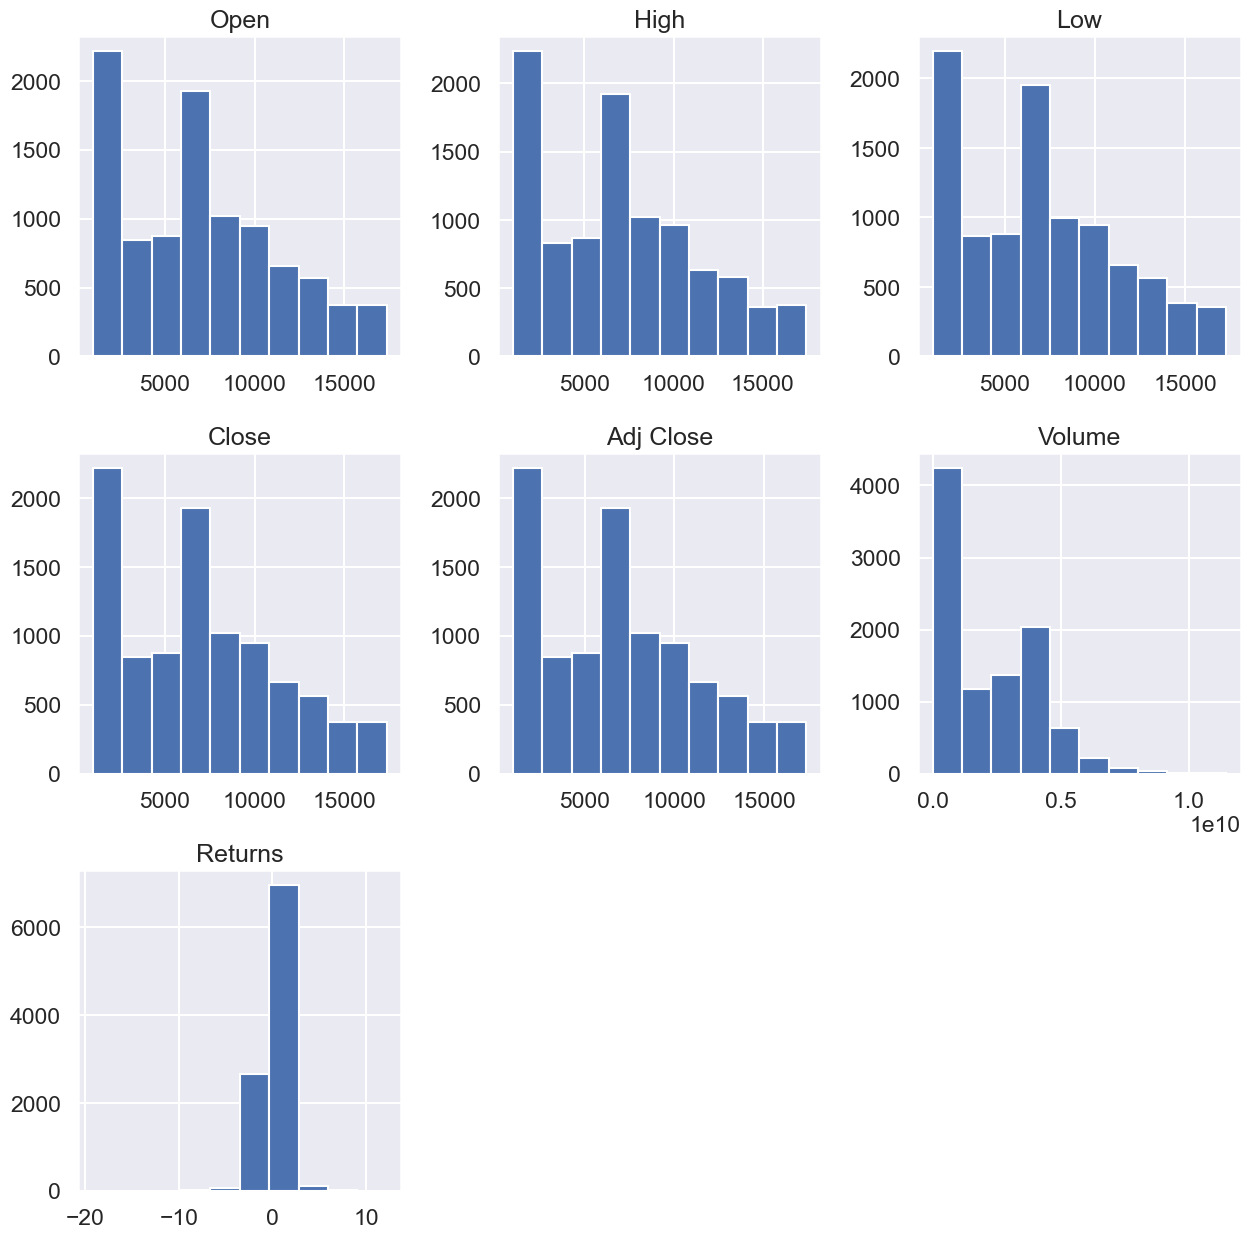

In [8]:
sns.set_theme(style = 'darkgrid', context = 'talk')

NYSE.hist(figsize=(15,15))
#many of these are prices variables so it makes sense that the graphs look similar

### Weather Data

In [9]:
weatherDF = pd.read_csv('../data/NYCweather1985toNov23.csv')
weatherDF.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"New York City,USA",1985-01-01,10.6,4.1,7.1,10.6,0.7,5.1,6.7,97.4,...,NaN,NaN,NaN,1985-01-01T07:20:17,1985-01-01T16:39:23,0.33,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"72502594741,72503794745,72502014734,7448609478..."
1,"New York City,USA",1985-01-02,12.1,2.3,7.6,12.1,-2.8,5.4,5.6,87.5,...,NaN,NaN,NaN,1985-01-02T07:20:23,1985-01-02T16:40:15,0.36,"Rain, Overcast",Cloudy skies throughout the day with rain in t...,rain,"72502594741,72503794745,72502014734,7448609478..."
2,"New York City,USA",1985-01-03,2.0,-1.5,0.3,-3.4,-7.1,-5.0,-7.9,54.6,...,NaN,NaN,NaN,1985-01-03T07:20:26,1985-01-03T16:41:08,0.39,Overcast,Cloudy skies throughout the day.,cloudy,"72502594741,72503794745,72502014734,7448609478..."
3,"New York City,USA",1985-01-04,0.7,-2.7,-1.1,-1.2,-8.2,-5.4,-8.6,58.1,...,NaN,NaN,NaN,1985-01-04T07:20:26,1985-01-04T16:42:02,0.42,"Snow, Rain, Overcast",Cloudy skies throughout the day with late afte...,rain,"72502594741,72503794745,72502014734,7448609478..."
4,"New York City,USA",1985-01-05,1.4,-3.6,-0.6,-4.7,-10.5,-6.9,-6.1,68.9,...,NaN,NaN,NaN,1985-01-05T07:20:25,1985-01-05T16:42:58,0.46,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"72502594741,72503794745,72502014734,7448609478..."


In [10]:
weatherDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14206 entries, 0 to 14205
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              14206 non-null  object 
 1   datetime          14206 non-null  object 
 2   tempmax           14206 non-null  float64
 3   tempmin           14206 non-null  float64
 4   temp              14206 non-null  float64
 5   feelslikemax      14206 non-null  float64
 6   feelslikemin      14206 non-null  float64
 7   feelslike         14206 non-null  float64
 8   dew               14206 non-null  float64
 9   humidity          14206 non-null  float64
 10  precip            14206 non-null  float64
 11  precipprob        14206 non-null  int64  
 12  precipcover       14206 non-null  float64
 13  preciptype        6468 non-null   object 
 14  snow              683 non-null    float64
 15  snowdepth         1790 non-null   float64
 16  windgust          5390 non-null   float6

In [11]:
#rename column for merging
weatherDF.rename(columns={'datetime' : 'Date'}, inplace=True)

#cleaning/reformatting sunrise and sunset columns
weatherDF['sunrise'] = weatherDF['sunrise'].str.split('T').str[-1]
weatherDF['sunset'] = weatherDF['sunset'].str.split('T').str[-1]

#convert the times (currently saved as strings) into datetime
weatherDF['sunset'] = weatherDF['sunset'].apply(lambda x: datetime.strptime(x,'%H:%M:%S'))
weatherDF['sunrise'] = weatherDF['sunrise'].apply(lambda x: datetime.strptime(x,'%H:%M:%S'))

#calculating amount of sunlight per day
weatherDF['Hours_of_Sunlight'] = weatherDF['sunset'] - weatherDF['sunrise']

"""Note: Need to convert to datetime first because time objects cannot be subtracted"""
#conversion to time objects
weatherDF['sunset'] = weatherDF['sunset'].apply(lambda x: x.time())
weatherDF['sunrise'] = weatherDF['sunrise'].apply(lambda x: x.time())
weatherDF['Hours_of_Sunlight'] = weatherDF['Hours_of_Sunlight'].apply(lambda x: (datetime.min +x).time())

weatherDF.head()


,name,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,Hours_of_Sunlight
0,"New York City,USA",1985-01-01,10.6,4.1,7.1,10.6,0.7,5.1,6.7,97.4,...,NaN,NaN,07:20:17,16:39:23,0.33,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"72502594741,72503794745,72502014734,7448609478...",09:19:06
1,"New York City,USA",1985-01-02,12.1,2.3,7.6,12.1,-2.8,5.4,5.6,87.5,...,NaN,NaN,07:20:23,16:40:15,0.36,"Rain, Overcast",Cloudy skies throughout the day with rain in t...,rain,"72502594741,72503794745,72502014734,7448609478...",09:19:52
2,"New York City,USA",1985-01-03,2.0,-1.5,0.3,-3.4,-7.1,-5.0,-7.9,54.6,...,NaN,NaN,07:20:26,16:41:08,0.39,Overcast,Cloudy skies throughout the day.,cloudy,"72502594741,72503794745,72502014734,7448609478...",09:20:42
3,"New York City,USA",1985-01-04,0.7,-2.7,-1.1,-1.2,-8.2,-5.4,-8.6,58.1,...,NaN,NaN,07:20:26,16:42:02,0.42,"Snow, Rain, Overcast",Cloudy skies throughout the day with late afte...,rain,"72502594741,72503794745,72502014734,7448609478...",09:21:36
4,"New York City,USA",1985-01-05,1.4,-3.6,-0.6,-4.7,-10.5,-6.9,-6.1,68.9,...,NaN,NaN,07:20:25,16:42:58,0.46,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"72502594741,72503794745,72502014734,7448609478...",09:22:33


### Merging NYSE and Weather data

In [12]:
#joining dataframes
# weatherDF['Date'] = pd.to_datetime(weatherDF['Date'])
# NYSE['Date'] = pd.to_datetime(NYSE['Date'])

NYSE_Weather = pd.merge(NYSE, weatherDF, how='right', on=['Date'])
NYSE_Weather.shape

(14206, 41)

In [13]:
#to grab month
weatherDF['Date'] = pd.to_datetime(weatherDF['Date'])
weatherDF['Date'].dt.month.value_counts()

Date
1     1209
3     1209
5     1209
7     1209
8     1209
10    1209
12    1178
4     1170
6     1170
9     1170
11    1163
2     1101
Name: count, dtype: int64

In [14]:
# #Removing day non-trading days (i.e. NYSE is closed)
NYSE_Weather.dropna(subset='Returns', inplace=True)

#resetting the index
NYSE_Weather.reset_index(drop=True, inplace=True)

#check (1/1/1985 removed and index reset)
NYSE_Weather.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,name,tempmax,...,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,Hours_of_Sunlight
0,1985-01-03,1005.030029,1005.030029,1005.030029,1005.030029,1005.030029,0.0,-0.398390,"New York City,USA",2.0,...,NaN,NaN,07:20:26,16:41:08,0.39,Overcast,Cloudy skies throughout the day.,cloudy,"72502594741,72503794745,72502014734,7448609478...",09:20:42
1,1985-01-04,1000.270020,1000.270020,1000.270020,1000.270020,1000.270020,0.0,-0.473619,"New York City,USA",0.7,...,NaN,NaN,07:20:26,16:42:02,0.42,"Snow, Rain, Overcast",Cloudy skies throughout the day with late afte...,rain,"72502594741,72503794745,72502014734,7448609478...",09:21:36
2,1985-01-07,1003.340027,1003.340027,1003.340027,1003.340027,1003.340027,0.0,0.306918,"New York City,USA",6.9,...,NaN,NaN,07:20:15,16:44:54,0.52,Overcast,Cloudy skies throughout the day.,cloudy,"72502594741,72503794745,72502014734,7448609478...",09:24:39
3,1985-01-08,1002.500000,1002.500000,1002.500000,1002.500000,1002.500000,0.0,-0.083723,"New York City,USA",2.9,...,NaN,NaN,07:20:07,16:45:53,0.56,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72502594741,72503794745,72502014734,7448609478...",09:25:46
4,1985-01-09,1009.159973,1009.159973,1009.159973,1009.159973,1009.159973,0.0,0.664336,"New York City,USA",-4.9,...,NaN,NaN,07:19:56,16:46:55,0.59,Clear,Clear conditions throughout the day.,clear-day,"72502594741,72503794745,72502014734,7448609478...",09:26:59


In [15]:
#check columns and dropping columns which will not be used
NYSE_Weather.columns

NYSE_Weather = NYSE_Weather[['Date', 'Open', 'Close', 'Volume', 'Returns',
                              'Hours_of_Sunlight','temp','humidity', 'precip','preciptype', 'snow','windspeed',
                              'cloudcover','visibility','sunrise', 'sunset','conditions','description',]]

NYSE_Weather.head()

,Date,Open,Close,Volume,Returns,Hours_of_Sunlight,temp,humidity,precip,preciptype,snow,windspeed,cloudcover,visibility,sunrise,sunset,conditions,description
0,1985-01-03,1005.030029,1005.030029,0.0,-0.398390,09:20:42,0.3,54.6,0.000,NaN,NaN,26.2,100.0,25.2,07:20:26,16:41:08,Overcast,Cloudy skies throughout the day.
1,1985-01-04,1000.270020,1000.270020,0.0,-0.473619,09:21:36,-1.1,58.1,1.247,"rain,snow",NaN,23.0,99.1,18.9,07:20:26,16:42:02,"Snow, Rain, Overcast",Cloudy skies throughout the day with late afte...
2,1985-01-07,1003.340027,1003.340027,0.0,0.306918,09:24:39,2.9,78.3,0.000,NaN,NaN,22.1,99.3,13.3,07:20:15,16:44:54,Overcast,Cloudy skies throughout the day.
3,1985-01-08,1002.500000,1002.500000,0.0,-0.083723,09:25:46,-1.5,57.0,0.000,NaN,NaN,46.8,32.1,29.5,07:20:07,16:45:53,Partially cloudy,Partly cloudy throughout the day.
4,1985-01-09,1009.159973,1009.159973,0.0,0.664336,09:26:59,-7.9,51.4,0.000,NaN,NaN,40.8,0.9,34.5,07:19:56,16:46:55,Clear,Clear conditions throughout the day.


In [16]:
#Saving dataframe as .csv for later use
NYSE_Weather.to_csv('../data/NYSE_Weather.csv', index= False)